#### 																				*1. Import Packages*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import statistics
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from itertools import permutations
from sklearn.preprocessing import RobustScaler
from scipy.spatial.distance import pdist, squareform


#### 																				*2. Dataset Space*

           X         Y
0   0.000000  0.049671
1   0.111111  0.097285
2   0.222222  0.286991
3   0.333333  0.485636
4   0.444444  0.421029
5   0.555556  0.532142
6   0.666667  1.824588
7   0.777778  0.854521
8   0.888889  0.841941
9   1.000000  1.054256
10  0.800000  1.600000


Number of samples: 11
Number of features: 2




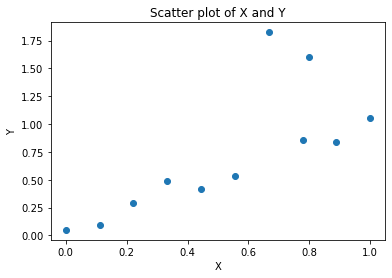

           0         1
0  -1.086957 -0.803610
1  -0.869565 -0.724305
2  -0.652174 -0.408327
3  -0.434783 -0.077460
4  -0.217391 -0.185071
5   0.000000  0.000000
6   0.217391  2.152719
7   0.434783  0.536960
8   0.652174  0.516007
9   0.869565  0.869642
10  0.478261  1.778641


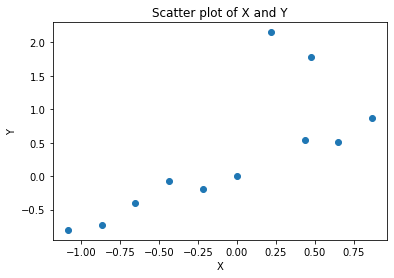

In [11]:
# Generate some sample data
#x1 = [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.,0.8]
#y1 = [0.04967142, 0.09728468, 0.28699108, 0.48563632, 0.42102911, 0.53214186, 0.82458795, 0.85452125, 0.84194145, 1.054256 ,1.6]

x1 = [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.,0.8]
y1 = [0.04967142, 0.09728468, 0.28699108, 0.48563632, 0.42102911, 0.53214186, 1.82458795, 0.85452125, 0.84194145, 1.054256 ,1.6]

# Combine the data into a DataFrame
x2 = pd.DataFrame({'X': x1, 'Y': y1})
s_row, s_col = x2.shape
cols = list(x2.columns)

# Print the DataFrame
print(x2)
print('\n')
print('Number of samples:', s_row)
print('Number of features:', s_col)
print('\n')

# Create a scatter plot
plt.scatter(x2['X'], x2['Y'])

# Add axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X and Y')

# Show the plot
plt.show()

# Perform robust scaling
scaler = RobustScaler()
x = pd.DataFrame(scaler.fit_transform(x2))

print(x)

# Create a scatter plot
plt.scatter(x[0], x[1])

# Add axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X and Y')

# Show the plot
plt.show()




#### *3. CO-MAD - Correlation Matrix Generator*

In [12]:
x_MAD = []
for column in x:
    x_MAD.append(np.absolute(x[column]-x[column].median()))
MAD = pd.DataFrame(x_MAD).T
print(MAD)

list_x = MAD.columns
comb = permutations(list_x, 2)
# Print the obtained combinations

perms = []
for i in list(comb):
    perms.append(i)
#print(perms)

diag = []
a = MAD.columns
for i in a:
    diag.append(tuple((i, i)))
#print(diag) 

corr_elems = diag + perms
print('\n')
print(f'The elements of the corr matrix are {corr_elems}')
print('\n')
print(f'The values of the corr_elems are')
print('\n')

corr_mat = []
for i in corr_elems:
    corr_mat.append(MAD[i[0]].append(MAD[i[1]], ignore_index = True).median(axis = 0))
    print(f'The median of the columns ({i[0]},{i[1]}) -> {(MAD[i[0]].append(MAD[i[1]], ignore_index = True).median(axis = 0))}')

print('\n')
matrix = np.diag(corr_mat[0:s_col])
print(matrix)
print('\n')
k = 0
for i in range(matrix.shape[1]):
    for j in range(matrix.shape[1]):
        if i != j:
            matrix[i][j] = corr_mat[s_col:][k]
            k += 1

print(f"Correlation matrix : \n\n {matrix}")

           0         1
0   1.086957  0.803610
1   0.869565  0.724305
2   0.652174  0.408327
3   0.434783  0.077460
4   0.217391  0.185071
5   0.000000  0.000000
6   0.217391  2.152719
7   0.434783  0.536960
8   0.652174  0.516007
9   0.869565  0.869642
10  0.478261  1.778641


The elements of the corr matrix are [(0, 0), (1, 1), (0, 1), (1, 0)]


The values of the corr_elems are


The median of the columns (0,0) -> 0.47826085723062417
The median of the columns (1,1) -> 0.5369602240773002
The median of the columns (0,1) -> 0.5264836668959498
The median of the columns (1,0) -> 0.5264836668959498


[[0.47826086 0.        ]
 [0.         0.53696022]]


Correlation matrix : 

 [[0.47826086 0.52648367]
 [0.52648367 0.53696022]]


#### *4. Eigen-Values & Eigen-Vectors*

In [13]:
# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(matrix)

# Sort the eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Print the sorted eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

eig_vals_total = sum(eigenvalues)
explained_variance = [(i / eig_vals_total)*100 for i in eigenvalues]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)
print('\nExplained variance             : {}'.format(explained_variance))

print('Cumulative explained variance  : {}'.format(cum_explained_variance))

Eigenvalues:
[ 1.03491165 -0.01969056]

Eigenvectors:
[[-0.6871462  -0.72651917]
 [-0.72651917  0.6871462 ]]

Explained variance             : [101.94  -1.94]
Cumulative explained variance  : [101.94 100.  ]


#### *5. Selecting 'k' eigen-values for transformation*

In [14]:
# Select 'k' no of eigen vectors
k = 1
W = eigenvectors[:k, :] # Projection matrix

# Transform the original dataset
X_proj = x.dot(W.T)

print(f'Shape of projection : {W.shape}')
print('\nNew projection:')
print(X_proj)

Shape of projection : (1, 2)

New projection:
           0
0   1.330736
1   1.123740
2   0.744796
3   0.355036
4   0.283837
5   0.000000
6  -1.713371
7  -0.688871
8  -0.823028
9  -1.229330
10 -1.620852


#### *6. PCA projection*

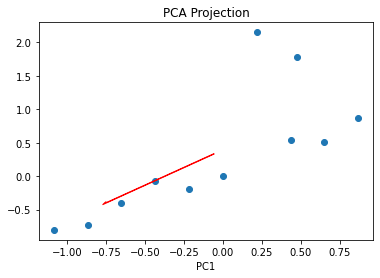

In [15]:
plt.scatter(x[0], x[1])
plt.arrow(x[0].mean(), x[1].mean(), eigenvectors[0, 0], eigenvectors[0, 1], color='r', width=0.01, shape='left')
plt.title("PCA Projection")
plt.xlabel("PC1")
plt.show()

#### *7. Distance Matrix of new projected points*

In [16]:
SF = pd.DataFrame(squareform(pdist(X_proj, metric='euclidean')))
print(f'\nSquare Form Matrix:\n{SF}')


Square Form Matrix:
          0         1         2         3         4         5         6   \
0   0.000000  0.206996  0.585940  0.975701  1.046899  1.330736  3.044107   
1   0.206996  0.000000  0.378944  0.768704  0.839903  1.123740  2.837111   
2   0.585940  0.378944  0.000000  0.389761  0.460959  0.744796  2.458167   
3   0.975701  0.768704  0.389761  0.000000  0.071198  0.355036  2.068407   
4   1.046899  0.839903  0.460959  0.071198  0.000000  0.283837  1.997208   
5   1.330736  1.123740  0.744796  0.355036  0.283837  0.000000  1.713371   
6   3.044107  2.837111  2.458167  2.068407  1.997208  1.713371  0.000000   
7   2.019608  1.812611  1.433667  1.043907  0.972708  0.688871  1.024500   
8   2.153764  1.946768  1.567824  1.178064  1.106865  0.823028  0.890343   
9   2.560066  2.353070  1.974126  1.584365  1.513167  1.229330  0.484041   
10  2.951589  2.744592  2.365648  1.975888  1.904690  1.620852  0.092519   

          7         8         9         10  
0   2.019608  2.15376